# Bengaluru House Price Prediction

<h2>Task</h2>
<p>The purpose of this task is to predict the prices of Bengaluru houses based on the data provided and any external dataset(s) with relevant information. </p>

## Importing Basics Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

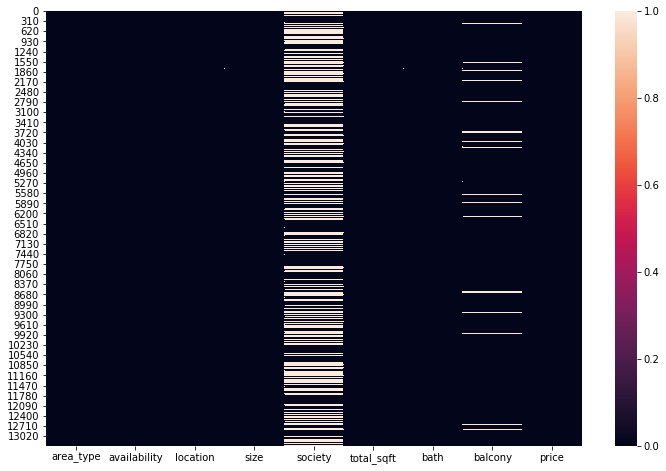

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())
plt.show()

In [9]:
# Droping society columns becuase it has maximum missing values and the society columns is not helpful to predicting price.
df.drop("society",axis=1,inplace=True)

In [10]:
df["balcony"] = df["balcony"].fillna(df["balcony"].mean())

In [11]:
df.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13246 non-null  object 
 1   availability  13246 non-null  object 
 2   location      13246 non-null  object 
 3   size          13246 non-null  object 
 4   total_sqft    13246 non-null  object 
 5   bath          13246 non-null  float64
 6   balcony       13246 non-null  float64
 7   price         13246 non-null  float64
dtypes: float64(3), object(5)
memory usage: 931.4+ KB


In [15]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
# Converting column (total_sqft) string to numeric 
total_sqft_int = []
for str_val in df["total_sqft"]:
    try:
        total_sqft_int.append(float(str_val))
    except:
        try:
            temp = []
            temp = str_var.split('-')
            total_sqft_int.append((float(temp[0])+float(temp[1]))/2)
        except:
            total_sqft_int.append(np.nan)

In [17]:
# Reset Index
df.reset_index(drop=True,inplace=True)

In [18]:
df = df.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))

In [19]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [20]:
df.isnull().sum()

area_type           0
availability        0
location            0
size                0
total_sqft          0
bath                0
balcony             0
price               0
total_sqft_int    190
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
total_sqft_int    0
dtype: int64

In [23]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [24]:
size_int = []
for val in df["size"]:
    temp = []
    temp = val.split(" ")
    try:
        size_int.append(int(temp[0]))
    except:
        size_int.append(np.nan)
        print("Noice = ",val)

In [25]:
df.reset_index(drop=True,inplace=True)

In [26]:
df = df.join(pd.DataFrame({'bhk': size_int}))

In [27]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2


In [28]:
df.groupby("area_type")["price"].mean()

area_type
Built-up  Area          103.279150
Carpet  Area             93.789506
Plot  Area              209.714771
Super built-up  Area     92.734543
Name: price, dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13056 entries, 0 to 13055
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13056 non-null  object 
 1   availability    13056 non-null  object 
 2   location        13056 non-null  object 
 3   size            13056 non-null  object 
 4   total_sqft      13056 non-null  object 
 5   bath            13056 non-null  float64
 6   balcony         13056 non-null  float64
 7   price           13056 non-null  float64
 8   total_sqft_int  13056 non-null  float64
 9   bhk             13056 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 1020.1+ KB


In [30]:
df.describe()

,bath,balcony,price,total_sqft_int,bhk
count,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000
mean,2.691942,1.603086,112.508062,1554.458192,2.805300
std,1.336034,0.786912,149.687320,1238.479835,1.293624
min,1.000000,0.000000,8.000000,1.000000,1.000000
25%,2.000000,1.000000,50.000000,1100.000000,2.000000
50%,2.000000,2.000000,72.000000,1275.000000,3.000000
75%,3.000000,2.000000,120.000000,1670.000000,3.000000
max,40.000000,3.000000,3600.000000,52272.000000,43.000000


In [31]:
# Here we consider that for 1bhk we need minimum 350 total sqft area
df[df["total_sqft_int"]/df["bhk"]>350].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2


In [32]:
# if 1bhk total sqft are less than 350 then we are going to remove it
df =  df[~(df["total_sqft_int"]/df["bhk"]<350)]
df.shape

(11963, 10)

In [33]:
# we are creating new feature that is price per sqft.
# it will help to find outliers.
df["price_per_sqft"] = df["price"]*100000 / df["total_sqft_int"]
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [34]:
df.describe()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
count,11963.000000,11963.000000,11963.000000,11963.000000,11963.000000,11963.000000
mean,2.537825,1.612592,110.845864,1602.280293,2.621416,6198.311830
std,1.044473,0.777391,153.967278,1275.666253,0.940657,4038.820774
min,1.000000,0.000000,9.000000,350.000000,1.000000,267.829813
25%,2.000000,1.000000,49.355000,1125.000000,2.000000,4200.000000
50%,2.000000,2.000000,69.500000,1306.000000,3.000000,5271.317829
75%,3.000000,2.000000,113.000000,1705.000000,3.000000,6818.181818
max,16.000000,3.000000,3600.000000,52272.000000,16.000000,176470.588235


In [35]:
# After looking into min and max of price per sqft column we found that there is an outliers present.
# So we decided to remove those outliers.
# And we ar taking std and mean per location

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<=(m+sd))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
        
    return df_out
        
df = remove_pps_outliers(df)

In [36]:
df.shape

(8787, 11)

In [37]:
df.describe()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
count,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000
mean,2.450552,1.621488,94.228464,1506.926049,2.543758,5706.331643
std,0.910474,0.762417,112.042750,894.103192,0.816677,2484.738313
min,1.000000,0.000000,10.000000,350.000000,1.000000,1250.000000
25%,2.000000,1.000000,49.500000,1115.000000,2.000000,4260.684326
50%,2.000000,2.000000,67.000000,1290.000000,2.000000,5188.679245
75%,3.000000,2.000000,100.000000,1650.000000,3.000000,6397.460283
max,12.000000,3.000000,2912.000000,30400.000000,10.000000,35000.000000


In [38]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571
3,Super built-up Area,18-May,Devarachikkanahalli,3 BHK,1250,2.0,3.0,44.0,1250.0,3,3520.000000
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1250.0,2,3200.000000


In [39]:
df["location"].value_counts()

Whitefield                  462
Sarjapur  Road              289
Electronic City             268
Kanakpura Road              187
Yelahanka                   162
                           ... 
BCMC Layout                   1
Kuvempu Nagar                 1
Chikku Lakshmaiah Layout      1
Postal Colony                 1
Gokula Extension              1
Name: location, Length: 739, dtype: int64

In [40]:
# This strip function will remove extra spaces if spaces are present at the end of location.
df.location = df.location.apply(lambda x: x.strip())

In [41]:
location_stats = df.groupby("location")["location"].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              462
Sarjapur  Road          289
Electronic City         269
Kanakpura Road          187
Yelahanka               162
                       ... 
Crimson Layout            1
Postal Colony             1
Cleveland Town            1
Church Street             1
1st Block BEL Layout      1
Name: location, Length: 736, dtype: int64

In [42]:
len(location_stats[location_stats<=10])

562

In [43]:
location_stats_less_than_10 = location_stats[location_stats<=10]
print(location_stats_less_than_10)

location
Dasanapura                10
Hoskote                   10
Gollarapalya Hosahalli    10
Mico Layout               10
Kodigehaali               10
                          ..
Crimson Layout             1
Postal Colony              1
Cleveland Town             1
Church Street              1
1st Block BEL Layout       1
Name: location, Length: 562, dtype: int64


In [44]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df.location.unique())

175

In [45]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,other,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,other,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,other,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571
3,Super built-up Area,18-May,Devarachikkanahalli,3 BHK,1250,2.0,3.0,44.0,1250.0,3,3520.000000
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1250.0,2,3200.000000


In [46]:
# Droping the columns which are not so important to predict the price
df.drop(["total_sqft","size","availability","price_per_sqft"],axis=1,inplace=True)

In [47]:
df.head()

,area_type,location,bath,balcony,price,total_sqft_int,bhk
0,Super built-up Area,other,3.0,2.0,150.0,1672.0,3
1,Built-up Area,other,3.0,3.0,149.0,1750.0,3
2,Super built-up Area,other,3.0,2.0,150.0,1750.0,3
3,Super built-up Area,Devarachikkanahalli,2.0,3.0,44.0,1250.0,3
4,Super built-up Area,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2


In [48]:
# Seperating categorical and numerical columns
df_num = df.select_dtypes(["int64","float64"])
df_cat = df.select_dtypes("object")

In [49]:
df_num.head()

,bath,balcony,price,total_sqft_int,bhk
0,3.0,2.0,150.0,1672.0,3
1,3.0,3.0,149.0,1750.0,3
2,3.0,2.0,150.0,1750.0,3
3,2.0,3.0,44.0,1250.0,3
4,2.0,2.0,40.0,1250.0,2


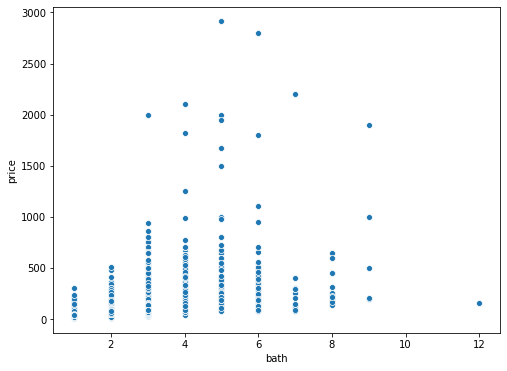

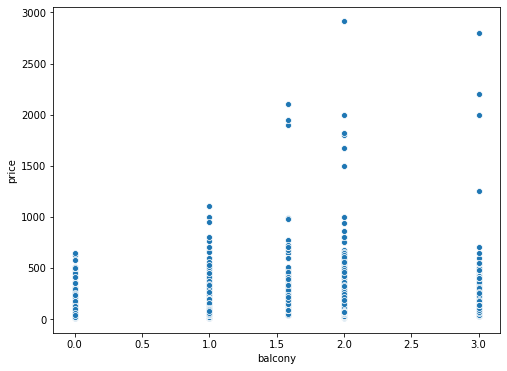

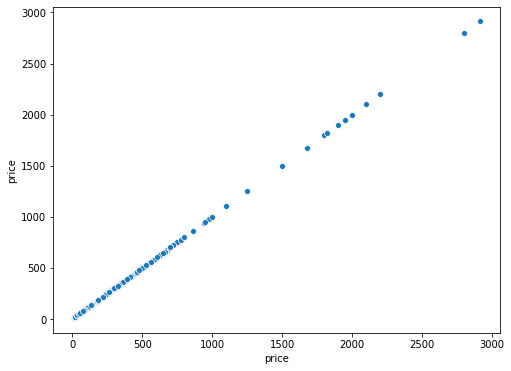

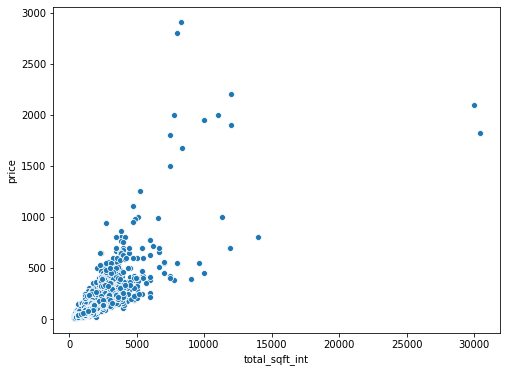

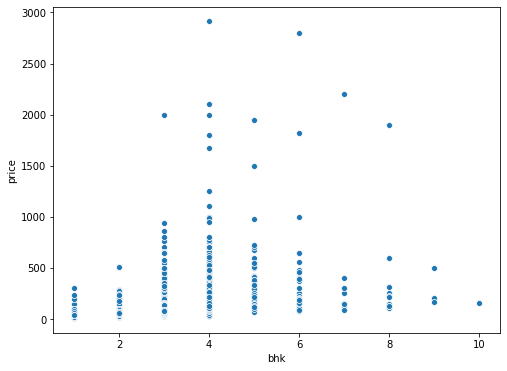

In [50]:
# Checking Linearity on numercial column
for col in df_num:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_num,x=col,y="price")
    plt.show()

In [51]:
# from above scatterplot we saw that price have linearity and total_sqft_int have slight linearity with price

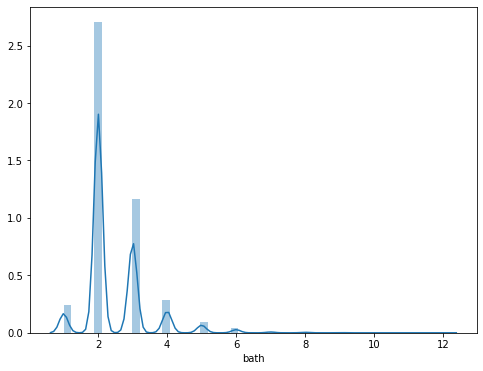

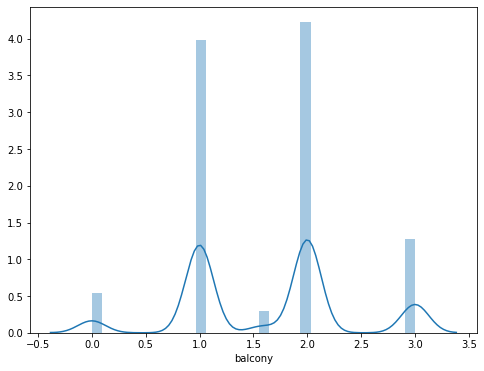

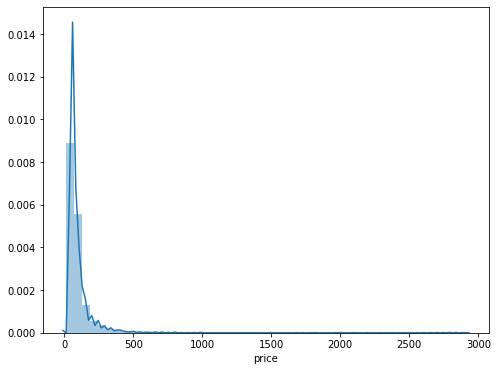

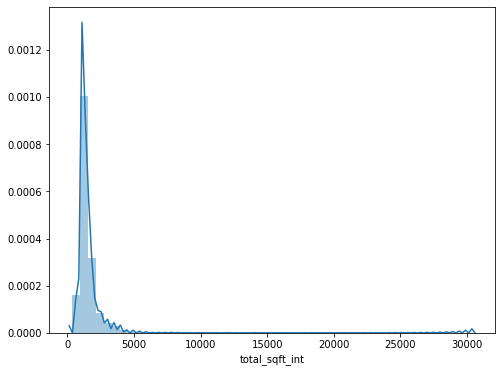

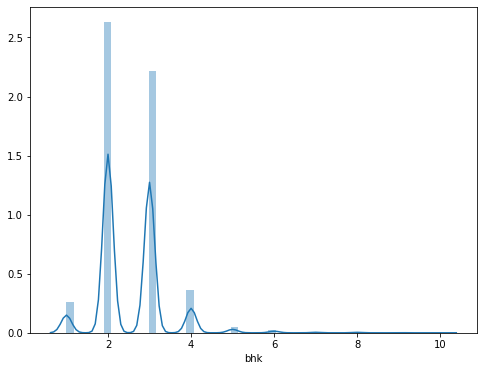

In [52]:
# Checking distribution whether some columns has normal distribution or not
for col in df_num:
    plt.figure(figsize=(8,6))
    sns.distplot(df_num[col])
    plt.show()

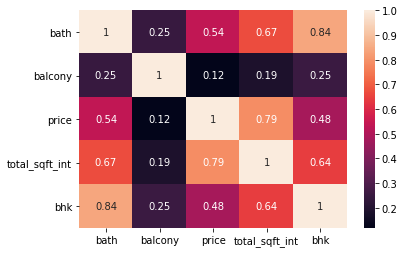

In [53]:
cor = df_num.corr()
sns.heatmap(cor,annot=True)
plt.show()

In [54]:
df_cat.head()

,area_type,location
0,Super built-up Area,other
1,Built-up Area,other
2,Super built-up Area,other
3,Super built-up Area,Devarachikkanahalli
4,Super built-up Area,Devarachikkanahalli


In [55]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [56]:
# Performing Standard scaling
for col in df_num:
    ss = StandardScaler()
    df_num[col] = ss.fit_transform(df_num[[col]])

In [57]:
# Performing Label Encoding
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [58]:
df_cat.head()

,area_type,location
0,3,174
1,0,174
2,3,174
3,3,51
4,3,51


In [59]:
df_new = pd.concat([df_cat,df_num],axis=1)

In [60]:
df_new.head()

,area_type,location,bath,balcony,price,total_sqft_int,bhk
0,3,174,0.603509,0.496491,0.497798,0.184636,0.558688
1,0,174,0.603509,1.808184,0.488873,0.271879,0.558688
2,3,174,0.603509,0.496491,0.497798,0.271879,0.558688
3,3,51,-0.494883,1.808184,-0.448323,-0.287373,0.558688
4,3,51,-0.494883,0.496491,-0.484026,-0.287373,-0.665855


In [61]:
# Spliting Dataset into train test split
X = df_new.drop("price",axis=1)
y = df_new["price"]

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error

In [65]:
lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()

In [66]:
def rmse(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

## Linear Regression

In [67]:
lr.fit(X_train,y_train)
lr_score = lr.score(X_test,y_test)
lr_rmse = rmse(y_test,lr.predict(X_test))
lr_score,lr_rmse

(0.6735876610306659, 0.5636098526630212)

## Lasso

In [68]:
lr_lasso.fit(X_train,y_train)
lr_lasso_score = lr_lasso.score(X_test,y_test)
lr_lasso_rmse = rmse(y_test,lr_lasso.predict(X_test))
lr_lasso_score,lr_lasso_rmse

(0.014180219273647432, 0.9794765816253675)

## Random Forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score = rfr.score(X_test,y_test)
rfr_rmse = rmse(y_test,rfr.predict(X_test))
rfr_score,rfr_rmse

(0.7702481791736748, 0.4728515029568525)

## Decision Tree Regressor

In [70]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_score = dtr.score(X_test,y_test)
dtr_rmse = rmse(y_test,dtr.predict(X_test))
dtr_score,dtr_rmse

(0.4625469563196484, 0.7232118876637857)

## XGBoost Regressor

In [71]:
import xgboost
xgb_r = xgboost.XGBRegressor()
xgb_r.fit(X_train,y_train)
xgb_r_score = xgb_r.score(X_test,y_test)
xgb_r_rmse = rmse(y_test,xgb_r.predict(X_test))
xgb_r_score,xgb_r_rmse

(0.695028833622716, 0.5447844253361845)

## Support Vector Regression

In [72]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_score = svr.score(X_test,y_test)
svr_rmse = rmse(y_test,svr.predict(X_test))
svr_score,svr_rmse

(0.33913069608377744, 0.80196069384183)

In [73]:
print(pd.DataFrame([{'Model':'Linear Regression' , 'Score':lr_score , 'RMSE':lr_rmse},
            {'Model':'Lasso' , 'Score':lr_lasso_score , 'RMSE':lr_lasso_rmse},
            {'Model':'Random Forest' , 'Score':rfr_score , 'RMSE':rfr_rmse},
            {'Model':'Decision Tree' , 'Score':dtr_score , 'RMSE':dtr_rmse},
            {'Model':'Xgboost' , 'Score':xgb_r_score , 'RMSE':xgb_r_rmse},
            {'Model':'Support Vector Machine' , 'Score':svr_score , 'RMSE':svr_rmse}],
            columns=['Model','Score','RMSE']))

                    Model     Score      RMSE
0       Linear Regression  0.673588  0.563610
1                   Lasso  0.014180  0.979477
2           Random Forest  0.770248  0.472852
3           Decision Tree  0.462547  0.723212
4                 Xgboost  0.695029  0.544784
5  Support Vector Machine  0.339131  0.801961


In [74]:
# Random Forest Regressor giving best accuracy (77%) on our dataset and it also giving less RMSE value(0.47) 
# rather than other models